 Predicting California housing prices.
 








In [0]:
#necessary import stuff
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sns.set_style('whitegrid')


In [0]:
# to read the csv file
df=pd.read_csv('/content/sample_data/california_housing_train.csv')

In [0]:
# to observe the data
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [0]:
#to check null values
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [0]:
''' the aim is to predict the housing value in California'''

Exploratory Data Analysis

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [0]:
df.describe().transpose() #to see the count , mean,std,min 25th,75th percentile

,count,mean,std,min,25%,50%,75%,max
longitude,17000.0,-119.562108,2.005166,-124.3500,-121.790000,-118.4900,-118.000,-114.3100
latitude,17000.0,35.625225,2.137340,32.5400,33.930000,34.2500,37.720,41.9500
housing_median_age,17000.0,28.589353,12.586937,1.0000,18.000000,29.0000,37.000,52.0000
total_rooms,17000.0,2643.664412,2179.947071,2.0000,1462.000000,2127.0000,3151.250,37937.0000
total_bedrooms,17000.0,539.410824,421.499452,1.0000,297.000000,434.0000,648.250,6445.0000
population,17000.0,1429.573941,1147.852959,3.0000,790.000000,1167.0000,1721.000,35682.0000
households,17000.0,501.221941,384.520841,1.0000,282.000000,409.0000,605.250,6082.0000
median_income,17000.0,3.883578,1.908157,0.4999,2.566375,3.5446,4.767,15.0001
median_house_value,17000.0,207300.912353,115983.764387,14999.0000,119400.000000,180400.0000,265000.000,500001.0000


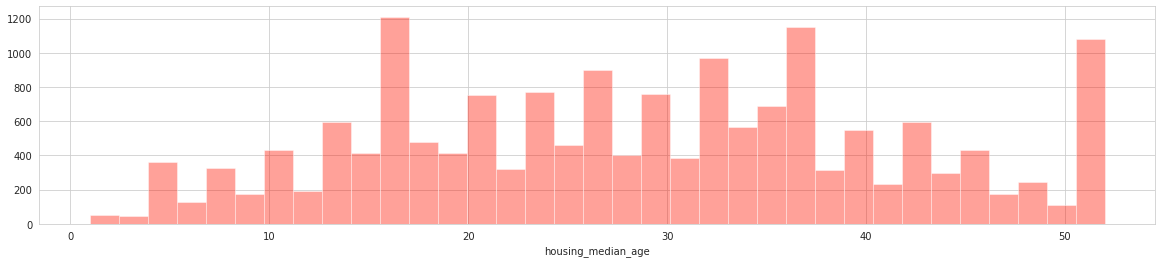

In [0]:
#A distribution plot for the median age of the houses
plt.figure(figsize=(20,4))
sns.distplot(df['housing_median_age'],kde=False)


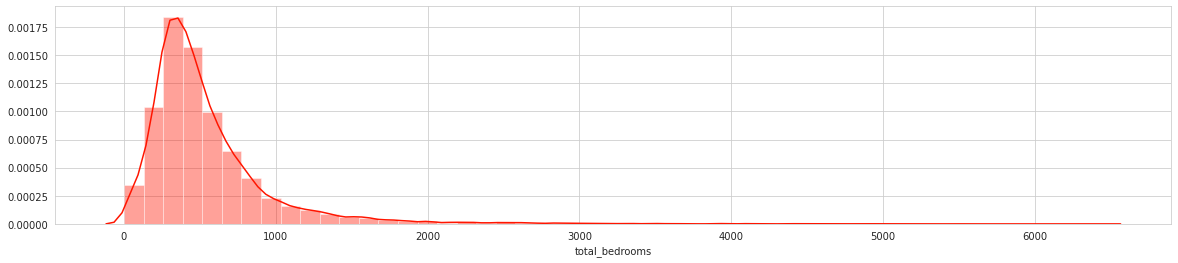

In [0]:
#A distribution to see the total bedrooms
plt.figure(figsize=(20,4))
sns.distplot(df['total_bedrooms'])

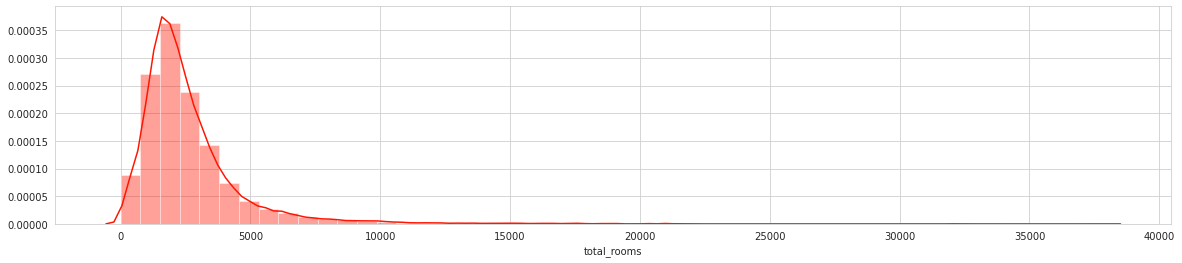

In [0]:
#distribution to see the total rooms in the house
plt.figure(figsize=(20,4))
sns.distplot(df['total_rooms'])

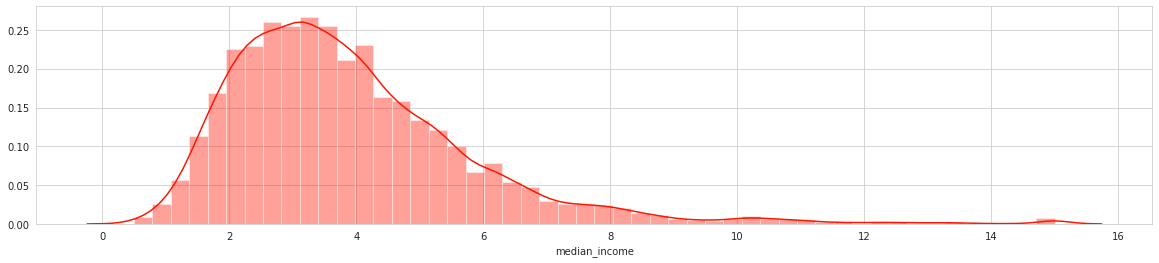

In [0]:
#plot for income distribution
plt.figure(figsize=(20,4))
sns.distplot(df['median_income'])

In [0]:
''' We will now estimate the areas that have above average housing prices and below average'''
def price_estimation(data):
  if(data>207300.912353):
    return 1
  else:
    return 0
df1=df.copy()
df1['above_or_below_avg']=df1['median_house_value'].apply(price_estimation)
df1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,above_or_below_avg
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,0


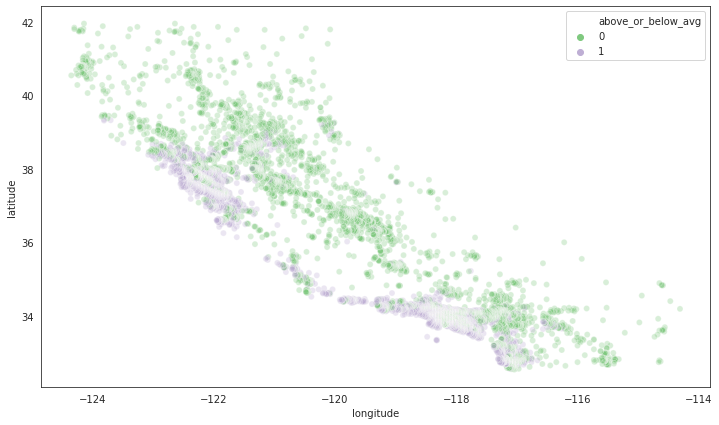

In [0]:
#we shall now reconstruct the california map with lattitude and longitude given and estimate above and below average housing
plt.figure(figsize=(12,7))
sns.set_style('white')
sns.scatterplot(x='longitude',y='latitude',data=df1,hue='above_or_below_avg',palette='Accent',alpha=0.3)


the bayside properties look expensive hence we can take that properties that are above average are near the bayside. thus we will modify our original dataframe

In [0]:
df['by_the_bay']=df['median_house_value'].apply(price_estimation)

In [0]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,by_the_bay
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,0


In [0]:
df.corr() #Check corelation

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,by_the_bay
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982,-0.069754
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917,-0.101436
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758,0.082110
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991,0.128323
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783,0.057256
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850,-0.015278
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031,0.073766
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871,0.542970
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000,0.804731
by_the_bay,-0.069754,-0.101436,0.082110,0.128323,0.057256,-0.015278,0.073766,0.542970,0.804731,1.000000


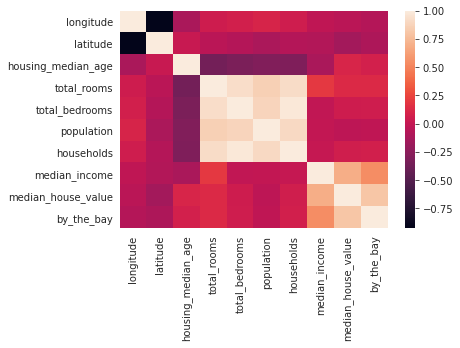

In [0]:
sns.heatmap(df.corr())

In [0]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,by_the_bay
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,0


In [0]:
X=df.drop('median_house_value',axis=1).values
y=df['median_house_value'].values #x,y

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101) #splitting data

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler() #scaling

In [0]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test) #scaling for train and test for X

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [0]:
model=Sequential()

In [0]:
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1)) #adding layers
model.compile(optimizer='adam',loss='mse')

In [0]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=400) #fitting the param in the model and traininng

Epoch 1/400
93/93 [==============================] - 0s 4ms/step - loss: 56205115392.0000 - val_loss: 56960790528.0000
Epoch 2/400
93/93 [==============================] - 0s 2ms/step - loss: 56204513280.0000 - val_loss: 56937340928.0000
Epoch 3/400
93/93 [==============================] - 0s 2ms/step - loss: 56126943232.0000 - val_loss: 56782401536.0000
Epoch 4/400
93/93 [==============================] - 0s 2ms/step - loss: 55833522176.0000 - val_loss: 56281825280.0000
Epoch 5/400
93/93 [==============================] - 0s 2ms/step - loss: 55053008896.0000 - val_loss: 55122251776.0000
Epoch 6/400
93/93 [==============================] - 0s 2ms/step - loss: 53481107456.0000 - val_loss: 52980568064.0000
Epoch 7/400
93/93 [==============================] - 0s 2ms/step - loss: 50799984640.0000 - val_loss: 49567977472.0000
Epoch 8/400
93/93 [==============================] - 0s 2ms/step - loss: 46808207360.0000 - val_loss: 44751544320.0000
Epoch 9/400
93/93 [=============================

In [0]:
error=pd.DataFrame(model.history.history)
error

,loss,val_loss
0,5.620512e+10,5.696079e+10
1,5.620451e+10,5.693734e+10
2,5.612694e+10,5.678240e+10
3,5.583352e+10,5.628183e+10
4,5.505301e+10,5.512225e+10
...,...,...
395,3.007260e+09,3.357653e+09
396,3.005799e+09,3.366354e+09
397,3.007009e+09,3.379081e+09
398,3.005225e+09,3.347291e+09


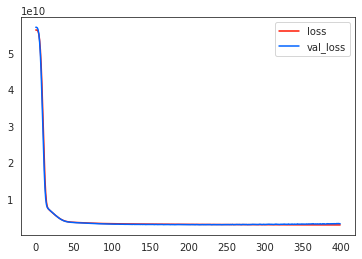

In [0]:
error.plot() #loss

In [0]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
predictions = model.predict(X_test)
mean_absolute_error(y_test,predictions)
#the error deviation is about $4200 from actual price

42712.67020177504

In [0]:
plt.scatter(y_test,predictions) 

In [0]:
single_house = df.drop('median_house_value',axis=1).iloc[0]
single_house = scaler.transform(single_house.values.reshape(-1, 9)) #new input

In [0]:
model.predict(single_house) #prediction

array([[46260.46]], dtype=float32)